In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
import torch
import random

In [26]:
purchase_df = pd.read_csv('../data/purchase.csv')
boxes_df = pd.read_csv('../data/boxes.csv')

In [27]:
purchase_df.head()

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT
0,1/2/2019,2CED678A247,12.0,1.0
1,1/2/2019,2BF58D91BA1,12.0,1.0
2,1/2/2019,2C15B86534E,99.0,1.0
3,1/2/2019,2C32D9A859A,6.0,1.0
4,1/2/2019,2C7A55404D1,4.0,1.0


In [28]:
# Use the dates to apply a day number to each purchase, offset from the base date, 1st October 2018
base_date = datetime.date(2018, 10, 1)
purchase_df['day'] = purchase_df['PURCHASE_DATE'].apply(lambda x: (datetime.datetime.strptime(x, '%d/%m/%Y').date() - base_date).days)

In [29]:
purchase_df.sample(10)

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT,day
1726729,18/11/2018,2C8E2B3FB90,4.0,1.0,48
1296268,12/12/2018,2BE187245AD,137.0,1.0,72
2113334,11/10/2018,2C7A6CD5AD4,131.0,1.0,10
1805220,18/11/2018,2C42580EFBC,163.0,1.0,48
1287413,12/12/2018,2BD9846EFB7,8.0,1.0,72
745149,9/1/2019,2CA47C100A6,106.0,1.0,100
2364444,22/10/2018,290C62E3E2C,258.0,1.0,21
83738,5/2/2019,2932F53A6E4,245.0,1.0,127
950529,21/1/2019,2C734C5FF7F,162.0,1.0,112
1882797,7/11/2018,2CC5E4A113A,163.0,1.0,37


In [30]:
# We don't need the date anymore
purchase_df.drop(['PURCHASE_DATE'], axis=1, inplace=True)

In [32]:
customer_keys = purchase_df['MAGIC_KEY'].unique()
customer_ids = {customer_keys[i]: i for i in range(len(customer_keys))}

In [33]:
# Drop the invalid data
purchase_df.drop(purchase_df[purchase_df['BOX_ID'].isnull()].index, inplace=True)
purchase_df.drop(purchase_df[purchase_df['BOX_COUNT'] < 0].index, inplace=True)

In [34]:
purchase_df['BOX_COUNT'] = purchase_df['BOX_COUNT'].astype(int)
purchase_df['BOX_ID'] = purchase_df['BOX_ID'].astype(int)

In [35]:
purchase_df.sample(10)

,MAGIC_KEY,BOX_ID,BOX_COUNT,day
351196,2CD3A143A98,77,1,140
1894781,2CAE35F4DE9,163,1,33
1713879,28DD6A0E075,253,1,60
774169,2C79BBA3156,103,1,102
2350122,2C2E10AD821,143,1,20
1804124,2C1C03B5C49,163,1,42
1345010,2CE46C243CE,163,1,76
1211241,28F8AF1C5C4,201,1,67
1262868,2CEA306C33A,163,1,70
1892159,2BC7E568F04,163,1,36


In [36]:
print(len(purchase_df['MAGIC_KEY'].unique()), len(purchase_df))

1274087 2455800


In [37]:
# Add BOX_ID, BOX_COUNT, day to each of the purchases of a customer
purchases = [[] for _ in range(len(customer_keys))]
purchase_df.apply(lambda x: purchases[customer_ids[x['MAGIC_KEY']]].append((x['BOX_ID'], x['BOX_COUNT'], x['day'])), axis=1)

0          None
1          None
2          None
3          None
4          None
           ... 
2455859    None
2455860    None
2455861    None
2455862    None
2455863    None
Length: 2455800, dtype: object

In [38]:
purchase_df.head()

,MAGIC_KEY,BOX_ID,BOX_COUNT,day
0,2CED678A247,12,1,123
1,2BF58D91BA1,12,1,123
2,2C15B86534E,99,1,123
3,2C32D9A859A,6,1,123
4,2C7A55404D1,4,1,123


In [39]:
prob1_df =pd.read_csv('../data/problem 1.csv')
prob1_df.head()

,MAGIC_KEY
0,28D5BB06356
1,293BEAB4E98
2,2962EE8065C
3,2957BE29EA9
4,28E351A0745


In [40]:
prob1_customers = [customer_ids[x] for x in prob1_df['MAGIC_KEY'].unique()]
print(len(prob1_customers))

58689


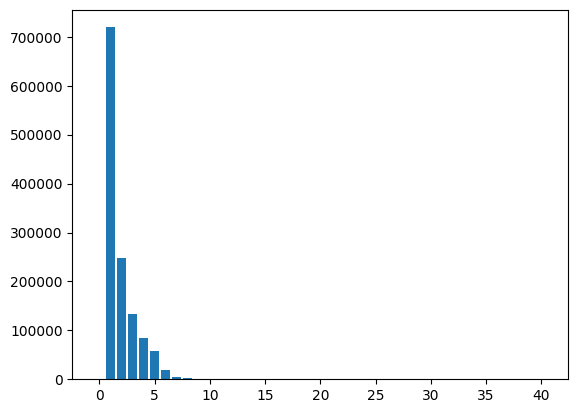

In [41]:
purchase_counts = {}
for i, _ in enumerate(purchases):
    cnt = len(purchases[i])
    if cnt not in purchase_counts:
        purchase_counts[cnt] = 1
    else:
        purchase_counts[cnt] += 1

# Generate bar chart of purchase counts
        
import matplotlib.pyplot as plt
plt.bar(purchase_counts.keys(), purchase_counts.values())
plt.show()

In [42]:
# Sort all the puchases of each customer by day
for i, _ in enumerate(purchases):
    purchases[i].sort(key=lambda x: x[2])

In [43]:
purchases_test = purchases
prob1_cust_purchases_list = []
# cid is the index of a customer in the purchases array
for cid in prob1_customers:
    prob1_cust_purchases_list.append(purchases_test[cid])

print(len(prob1_cust_purchases_list))
print(prob1_cust_purchases_list[0:10])


58689
[[(255, 1, 83), (255, 1, 118), (248, 1, 148)], [(233, 1, 6), (271, 1, 67), (272, 1, 99), (272, 1, 130)], [(255, 1, 113), (255, 1, 139)], [(258, 1, 65), (258, 1, 94)], [(255, 1, 29), (255, 1, 56), (255, 1, 86), (255, 1, 116)], [(237, 1, 69), (237, 1, 123)], [(260, 1, 1), (258, 1, 31), (270, 1, 61), (272, 1, 91), (272, 1, 121)], [(255, 1, 120), (251, 1, 148)], [(258, 1, 61), (255, 1, 113)], [(258, 1, 97), (258, 1, 125)]]


In [45]:
data = []
for cid in prob1_customers:
    data.append({
        'MAGIC_KEY': customer_keys[cid],
        'CID': cid,
        'PURCHASE': purchases_test[cid]
    })
sub_df = pd.DataFrame(data, columns=['MAGIC_KEY','CID','PURCHASE'])

print(sub_df.head())
print(sub_df['PURCHASE'])

     MAGIC_KEY     CID                                           PURCHASE
0  28D5BB06356  494062       [(255, 1, 83), (255, 1, 118), (248, 1, 148)]
1  293BEAB4E98  143522  [(233, 1, 6), (271, 1, 67), (272, 1, 99), (272...
2  2962EE8065C  317373                     [(255, 1, 113), (255, 1, 139)]
3  2957BE29EA9  585892                       [(258, 1, 65), (258, 1, 94)]
4  28E351A0745  757524  [(255, 1, 29), (255, 1, 56), (255, 1, 86), (25...
0             [(255, 1, 83), (255, 1, 118), (248, 1, 148)]
1        [(233, 1, 6), (271, 1, 67), (272, 1, 99), (272...
2                           [(255, 1, 113), (255, 1, 139)]
3                             [(258, 1, 65), (258, 1, 94)]
4        [(255, 1, 29), (255, 1, 56), (255, 1, 86), (25...
                               ...                        
58684    [(258, 1, 36), (258, 1, 77), (272, 1, 117), (2...
58685                       [(245, 1, 104), (251, 1, 150)]
58686                       [(217, 1, 103), (217, 1, 127)]
58687                    

136 denotes February 14, 2019; 150 denotes February 28, 2019.
We are trying to predict, for validation, if a customer will make a purchase between 14th and 28th February. The reason is we have all the data available for this range.

In [47]:
sub_df['LABEL'] = sub_df['PURCHASE'].apply(
    lambda x: 'Y' if 136 <= x[-1][-1] <= 150 else 'N'
)

print(sub_df.head())

     MAGIC_KEY     CID                                           PURCHASE  \
0  28D5BB06356  494062       [(255, 1, 83), (255, 1, 118), (248, 1, 148)]   
1  293BEAB4E98  143522  [(233, 1, 6), (271, 1, 67), (272, 1, 99), (272...   
2  2962EE8065C  317373                     [(255, 1, 113), (255, 1, 139)]   
3  2957BE29EA9  585892                       [(258, 1, 65), (258, 1, 94)]   
4  28E351A0745  757524  [(255, 1, 29), (255, 1, 56), (255, 1, 86), (25...   

  LABEL  
0     Y  
1     N  
2     Y  
3     N  
4     N  


In [48]:
# We are removing the purchases that are after the assumed cutoff day, February 13, 2019
sub_df['PURCHASE_CLEANED'] = sub_df['PURCHASE'].apply(
    lambda lst: [tup for tup in lst if tup[-1] < 136]
)
print(sub_df.head())

     MAGIC_KEY     CID                                           PURCHASE  \
0  28D5BB06356  494062       [(255, 1, 83), (255, 1, 118), (248, 1, 148)]   
1  293BEAB4E98  143522  [(233, 1, 6), (271, 1, 67), (272, 1, 99), (272...   
2  2962EE8065C  317373                     [(255, 1, 113), (255, 1, 139)]   
3  2957BE29EA9  585892                       [(258, 1, 65), (258, 1, 94)]   
4  28E351A0745  757524  [(255, 1, 29), (255, 1, 56), (255, 1, 86), (25...   

  LABEL                                   PURCHASE_CLEANED  
0     Y                      [(255, 1, 83), (255, 1, 118)]  
1     N  [(233, 1, 6), (271, 1, 67), (272, 1, 99), (272...  
2     Y                                    [(255, 1, 113)]  
3     N                       [(258, 1, 65), (258, 1, 94)]  
4     N  [(255, 1, 29), (255, 1, 56), (255, 1, 86), (25...  


In [49]:
# Taking the adjacent difference in days between the purchases for a customer
sub_df['PURCHASE_DIFF'] = sub_df['PURCHASE_CLEANED'].apply(
    lambda lst: [lst[i+1][-1] - lst[i][-1] for i in range(len(lst)-1)]
)

print(sub_df.head())

     MAGIC_KEY     CID                                           PURCHASE  \
0  28D5BB06356  494062       [(255, 1, 83), (255, 1, 118), (248, 1, 148)]   
1  293BEAB4E98  143522  [(233, 1, 6), (271, 1, 67), (272, 1, 99), (272...   
2  2962EE8065C  317373                     [(255, 1, 113), (255, 1, 139)]   
3  2957BE29EA9  585892                       [(258, 1, 65), (258, 1, 94)]   
4  28E351A0745  757524  [(255, 1, 29), (255, 1, 56), (255, 1, 86), (25...   

  LABEL                                   PURCHASE_CLEANED PURCHASE_DIFF  
0     Y                      [(255, 1, 83), (255, 1, 118)]          [35]  
1     N  [(233, 1, 6), (271, 1, 67), (272, 1, 99), (272...  [61, 32, 31]  
2     Y                                    [(255, 1, 113)]            []  
3     N                       [(258, 1, 65), (258, 1, 94)]          [29]  
4     N  [(255, 1, 29), (255, 1, 56), (255, 1, 86), (25...  [27, 30, 30]  


In [50]:
# Filter out rows where the length of the list in 'PURCHASE_CLEANED' is 1
sub_df = sub_df[sub_df['PURCHASE_CLEANED'].apply(len) > 1]

print(sub_df.head())

     MAGIC_KEY     CID                                           PURCHASE  \
0  28D5BB06356  494062       [(255, 1, 83), (255, 1, 118), (248, 1, 148)]   
1  293BEAB4E98  143522  [(233, 1, 6), (271, 1, 67), (272, 1, 99), (272...   
3  2957BE29EA9  585892                       [(258, 1, 65), (258, 1, 94)]   
4  28E351A0745  757524  [(255, 1, 29), (255, 1, 56), (255, 1, 86), (25...   
5  28FC625FED5    8353                      [(237, 1, 69), (237, 1, 123)]   

  LABEL                                   PURCHASE_CLEANED PURCHASE_DIFF  
0     Y                      [(255, 1, 83), (255, 1, 118)]          [35]  
1     N  [(233, 1, 6), (271, 1, 67), (272, 1, 99), (272...  [61, 32, 31]  
3     N                       [(258, 1, 65), (258, 1, 94)]          [29]  
4     N  [(255, 1, 29), (255, 1, 56), (255, 1, 86), (25...  [27, 30, 30]  
5     N                      [(237, 1, 69), (237, 1, 123)]          [54]  


In [51]:
# Creating new columns for the mean and standard deviation of the purchase differences
sub_df['MEAN_PURCHASE_DIFF'] = sub_df['PURCHASE_DIFF'].apply(lambda x: np.mean(x) if x else np.nan)
sub_df['STD_PURCHASE_DIFF'] = sub_df['PURCHASE_DIFF'].apply(lambda x: np.std(x) if x else np.nan)

print(sub_df.head())

     MAGIC_KEY     CID                                           PURCHASE  \
0  28D5BB06356  494062       [(255, 1, 83), (255, 1, 118), (248, 1, 148)]   
1  293BEAB4E98  143522  [(233, 1, 6), (271, 1, 67), (272, 1, 99), (272...   
3  2957BE29EA9  585892                       [(258, 1, 65), (258, 1, 94)]   
4  28E351A0745  757524  [(255, 1, 29), (255, 1, 56), (255, 1, 86), (25...   
5  28FC625FED5    8353                      [(237, 1, 69), (237, 1, 123)]   

  LABEL                                   PURCHASE_CLEANED PURCHASE_DIFF  \
0     Y                      [(255, 1, 83), (255, 1, 118)]          [35]   
1     N  [(233, 1, 6), (271, 1, 67), (272, 1, 99), (272...  [61, 32, 31]   
3     N                       [(258, 1, 65), (258, 1, 94)]          [29]   
4     N  [(255, 1, 29), (255, 1, 56), (255, 1, 86), (25...  [27, 30, 30]   
5     N                      [(237, 1, 69), (237, 1, 123)]          [54]   

   MEAN_PURCHASE_DIFF  STD_PURCHASE_DIFF  
0           35.000000           0.000

In [52]:
print(len(sub_df))
sub_df.head()

53822


,MAGIC_KEY,CID,PURCHASE,LABEL,PURCHASE_CLEANED,PURCHASE_DIFF,MEAN_PURCHASE_DIFF,STD_PURCHASE_DIFF
0,28D5BB06356,494062,"[(255, 1, 83), (255, 1, 118), (248, 1, 148)]",Y,"[(255, 1, 83), (255, 1, 118)]",[35],35.000000,0.000000
1,293BEAB4E98,143522,"[(233, 1, 6), (271, 1, 67), (272, 1, 99), (272...",N,"[(233, 1, 6), (271, 1, 67), (272, 1, 99), (272...","[61, 32, 31]",41.333333,13.912425
3,2957BE29EA9,585892,"[(258, 1, 65), (258, 1, 94)]",N,"[(258, 1, 65), (258, 1, 94)]",[29],29.000000,0.000000
4,28E351A0745,757524,"[(255, 1, 29), (255, 1, 56), (255, 1, 86), (25...",N,"[(255, 1, 29), (255, 1, 56), (255, 1, 86), (25...","[27, 30, 30]",29.000000,1.414214
5,28FC625FED5,8353,"[(237, 1, 69), (237, 1, 123)]",N,"[(237, 1, 69), (237, 1, 123)]",[54],54.000000,0.000000


In [53]:
# mean - stdev
sub_df['MIN'] = sub_df['MEAN_PURCHASE_DIFF'] - 1.0 * sub_df['STD_PURCHASE_DIFF']
# mean + stdev
sub_df['MAX'] = sub_df['MEAN_PURCHASE_DIFF'] + 1.0 * sub_df['STD_PURCHASE_DIFF']

print(sub_df.head())

     MAGIC_KEY     CID                                           PURCHASE  \
0  28D5BB06356  494062       [(255, 1, 83), (255, 1, 118), (248, 1, 148)]   
1  293BEAB4E98  143522  [(233, 1, 6), (271, 1, 67), (272, 1, 99), (272...   
3  2957BE29EA9  585892                       [(258, 1, 65), (258, 1, 94)]   
4  28E351A0745  757524  [(255, 1, 29), (255, 1, 56), (255, 1, 86), (25...   
5  28FC625FED5    8353                      [(237, 1, 69), (237, 1, 123)]   

  LABEL                                   PURCHASE_CLEANED PURCHASE_DIFF  \
0     Y                      [(255, 1, 83), (255, 1, 118)]          [35]   
1     N  [(233, 1, 6), (271, 1, 67), (272, 1, 99), (272...  [61, 32, 31]   
3     N                       [(258, 1, 65), (258, 1, 94)]          [29]   
4     N  [(255, 1, 29), (255, 1, 56), (255, 1, 86), (25...  [27, 30, 30]   
5     N                      [(237, 1, 69), (237, 1, 123)]          [54]   

   MEAN_PURCHASE_DIFF  STD_PURCHASE_DIFF        MIN        MAX  
0           35.

We are taking the last purchase of each valid customer (validity has to do with having enough purchase data for the customer). We then add this last purchase to the mean purchase difference. Now, to get a range, we subtract the stdev from it and add to it respectively. Thus, we get a predicted range of dates for the next purchase. Reasonably, if there is an overlap between this and the first 15 days of March 2019, we predict 'Y', else 'N'.

In [54]:
# Function to safely retrieve the last element of the last tuple
def get_last_element(lst):
    if lst and lst[-1]:  # Check if the list and the last tuple are not empty
        return lst[-1][-1]  # Return the last element of the last tuple
    return 0  # Return 0 or NaN depending on how you want to handle empty lists or tuples

sub_df['MIN_DAY'] = sub_df['MIN'] + sub_df['PURCHASE_CLEANED'].apply(get_last_element)
sub_df['MAX_DAY'] = sub_df['MAX'] + sub_df['PURCHASE_CLEANED'].apply(get_last_element)

print(sub_df.head())

     MAGIC_KEY     CID                                           PURCHASE  \
0  28D5BB06356  494062       [(255, 1, 83), (255, 1, 118), (248, 1, 148)]   
1  293BEAB4E98  143522  [(233, 1, 6), (271, 1, 67), (272, 1, 99), (272...   
3  2957BE29EA9  585892                       [(258, 1, 65), (258, 1, 94)]   
4  28E351A0745  757524  [(255, 1, 29), (255, 1, 56), (255, 1, 86), (25...   
5  28FC625FED5    8353                      [(237, 1, 69), (237, 1, 123)]   

  LABEL                                   PURCHASE_CLEANED PURCHASE_DIFF  \
0     Y                      [(255, 1, 83), (255, 1, 118)]          [35]   
1     N  [(233, 1, 6), (271, 1, 67), (272, 1, 99), (272...  [61, 32, 31]   
3     N                       [(258, 1, 65), (258, 1, 94)]          [29]   
4     N  [(255, 1, 29), (255, 1, 56), (255, 1, 86), (25...  [27, 30, 30]   
5     N                      [(237, 1, 69), (237, 1, 123)]          [54]   

   MEAN_PURCHASE_DIFF  STD_PURCHASE_DIFF        MIN        MAX     MIN_DAY  \
0 

In [56]:
sub_df['PREDICTION'] = sub_df.apply(
    lambda row: 'Y' if (row['MIN_DAY'] <= 150 and row['MAX_DAY'] >= 136) else 'N', axis=1
)

print(sub_df.head())

     MAGIC_KEY     CID                                           PURCHASE  \
0  28D5BB06356  494062       [(255, 1, 83), (255, 1, 118), (248, 1, 148)]   
1  293BEAB4E98  143522  [(233, 1, 6), (271, 1, 67), (272, 1, 99), (272...   
3  2957BE29EA9  585892                       [(258, 1, 65), (258, 1, 94)]   
4  28E351A0745  757524  [(255, 1, 29), (255, 1, 56), (255, 1, 86), (25...   
5  28FC625FED5    8353                      [(237, 1, 69), (237, 1, 123)]   

  LABEL                                   PURCHASE_CLEANED PURCHASE_DIFF  \
0     Y                      [(255, 1, 83), (255, 1, 118)]          [35]   
1     N  [(233, 1, 6), (271, 1, 67), (272, 1, 99), (272...  [61, 32, 31]   
3     N                       [(258, 1, 65), (258, 1, 94)]          [29]   
4     N  [(255, 1, 29), (255, 1, 56), (255, 1, 86), (25...  [27, 30, 30]   
5     N                      [(237, 1, 69), (237, 1, 123)]          [54]   

   MEAN_PURCHASE_DIFF  STD_PURCHASE_DIFF        MIN        MAX     MIN_DAY  \
0 

In [57]:
submit_df = sub_df[['MAGIC_KEY', 'PREDICTION']]

print(submit_df)

         MAGIC_KEY PREDICTION
0      28D5BB06356          N
1      293BEAB4E98          N
3      2957BE29EA9          N
4      28E351A0745          Y
5      28FC625FED5          N
...            ...        ...
58682  28F9C0CA4BD          Y
58683  28EE78A5C77          Y
58684  28FB7C09776          N
58686  28D343103A7          N
58687  290B1D6D5CB          N

[53822 rows x 2 columns]


In [58]:
submit_df = submit_df.rename(columns={'PREDICTION': 'PURCHASE'})

print(submit_df)

         MAGIC_KEY PURCHASE
0      28D5BB06356        N
1      293BEAB4E98        N
3      2957BE29EA9        N
4      28E351A0745        Y
5      28FC625FED5        N
...            ...      ...
58682  28F9C0CA4BD        Y
58683  28EE78A5C77        Y
58684  28FB7C09776        N
58686  28D343103A7        N
58687  290B1D6D5CB        N

[53822 rows x 2 columns]


In [59]:
submit_df.to_csv('submission.csv', index = False)

In [60]:
# Calculate accuracy of the 'PREDICTION'
matches = (sub_df['PREDICTION'] == sub_df['LABEL']).sum()  # Count matching predictions
total_predictions = len(sub_df)  # Total number of predictions
accuracy = matches / total_predictions  # Calculate accuracy

# Print the accuracy
print(f"Accuracy: {accuracy:.4f}")  # Prints accuracy as a fraction, formatted to 4 decimal places

Accuracy: 0.6905


In [61]:
# Find rows where there is a mismatch between 'LABEL' and 'PREDICTION'
mismatches = sub_df[sub_df['LABEL'] != sub_df['PREDICTION']]

# Calculate the length of each 'PURCHASE_CLEANED' list in these mismatched rows
mismatches['CLEANED_LENGTH'] = mismatches['PURCHASE_CLEANED'].apply(len)

# Count the frequency of each list length
length_counts = mismatches['CLEANED_LENGTH'].value_counts()

# Print the frequency of each list length
print("Frequency of list lengths in mismatches:")
print(length_counts)

Frequency of list lengths in mismatches:
CLEANED_LENGTH
2     5012
3     4333
4     3843
5     2063
6      800
7      323
8      127
9       66
10      31
11      22
12      14
13       8
16       5
20       3
14       3
15       2
17       2
22       1
18       1
Name: count, dtype: int64


/tmp/ipykernel_20774/1728651918.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mismatches['CLEANED_LENGTH'] = mismatches['PURCHASE_CLEANED'].apply(len)


In [62]:
# Assuming sub_df is your existing DataFrame with 'PURCHASE_CLEANED' already populated
# Calculate the length of each list in 'PURCHASE_CLEANED'
sub_df['CLEANED_LENGTH'] = sub_df['PURCHASE_CLEANED'].apply(len)

# Count the frequency of each list length
length_counts = sub_df['CLEANED_LENGTH'].value_counts()

# Print the frequency of each list length
print("Frequency of list lengths in PURCHASE_CLEANED:")
print(length_counts)

Frequency of list lengths in PURCHASE_CLEANED:
CLEANED_LENGTH
2     14913
3     14404
4     13213
5      7813
6      1967
7       699
8       330
9       172
10       94
11       64
12       48
13       35
14       20
15       10
16       10
20        8
18        8
17        5
24        2
22        2
33        1
21        1
19        1
29        1
26        1
Name: count, dtype: int64
